<div align="center">

# Higher Diploma in Science in Computing (Data Analytics)
# Applied Statistics Module

</div>

# Table of Contents
***
1. Description
2. Explore the Problems 
    -   Problem 1: Extending the Lady Tasting Tea
    -   Problem 2: Normal Distribution
    -   Problem 3: t-Tests
    -   Problem 4: ANOVA
3. Conclusion

# 1. Description
***
The following notebook will outline all the Problems 1-4 for the Applied Statistics Module.

# 2. Explore the Problems
***

## Problem 1: Extending the Lady Tasting Tea

In the original experiment (by R.A. Fisher), a lady claimed she could tell whether milk or tea was poured first into a cup. There were 8 cups:
4 poured milk-first and 4 poured tea-first. In this extended version, we increase the total to 12 cups:8 poured tea-first and 4 poured milk-first.
We’ll use combinatorial reasoning and simulation to estimate the chance of getting all answers right by random guessing, and compare it to the
original design.

In your notebook, 
- explain your simulation process clearly, 
- report and interpret the estimated probability, 
- and discuss whether, based on this probability, you would consider extending or relaxing the p-value threshold compared to the original design.  

- [Wikipedia: Lady Tasting Tea](https://en.wikipedia.org/wiki/Lady_tasting_tea)
- [Wikipedia: Null Hypothesis](https://en.wikipedia.org/wiki/Null_hypothesis)
- [Wikipedia: Exact Test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test)
- [Statistics Easily: Lady Tasting Test](https://statisticseasily.com/lady-tasting-tea)
- [Statistics Easily: p-value](https://statisticseasily.com/2022/04/24/p-value/)


Summary
- Hypothesis
- Null Hypothesis
- Alternative Hpothesis
- Evidence
- Calculating a statistic 
- Type I & tYPE II errors



18 minutes 20 seconds  - Ian
You look at your the claim being made, you try and design an experiment that will lead to a mathematical situation where you can make calculations to infer things about the claim that was originally made. You do your calculations and then you look at the calculations, go, what was the probability of this? If it's very, very, very little, you might go, I'll reject the null hypothesis. 

The last point is it's important to understand that if the lady doesn't get this right, you're not, you're not really rejecting her claim, right? 
And if she does get it right, you're not really, well, I suppose you are accepting her claim. Overall, what I'm trying to say is that the the calculations and the statistics are not making your decision for you. You're making a human decision yourself. 
Based on the calculations that the results of the calculations that you have agreed to do in advance. 
That's kind of being fair about the statistics that you're doing.


#### Imports

In [82]:
# Mathematical functions from the standard library.
# https://docs.python.org/3/library/math.html
import math

# Permutations and combinations.
# https://docs.python.org/3/library/itertools.html
import itertools

# Random selections.
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and operations.
# https://numpy.org/doc/stable/reference/index.html#reference
import numpy as np

# Plotting.
# https://matplotlib.org/stable/contents.html
import matplotlib.pyplot as plt

#### Experimental setup

In [83]:
# Number of cups of tea in total.
no_cups = 12

# Number of cups of tea with milk in first.
no_cups_milk_first = 4

# Number of cups of tea with tea in first.
no_cups_tea_first = 8

##### Combinatorial reasoning

The participant must choose 4 cups out of 12 that they believe were milk-first. The number of possible combinations (without regard to order) is "12 choose 4". The Python math.comb() method returns the number of ways to choose k items from n items without repetition and without order.
- <small>[Python.org: Mathematical functions](https://docs.python.org/3/library/math.html#math.comb)
- [Tutorialspoint: Python math.comb() Method](https://www.tutorialspoint.com/python/python_math_comb_method.htm)<small>

In [84]:
# Number of ways of selecting four cups from twelve
ways = math.comb(no_cups, no_cups_milk_first)

# Display the number of combinations
ways

495

There are 495 possible ways the participant could guess which 4 cups were milk-first. Thus, if they are purely guessing, the probability of getting them all correct by chance is 1/495 ≈ 0.00202 (about 0.2%).


#### Ordered selections (just for fun)

If we wanted to include the order of guesses.

In [85]:
# Total number of ways of selecting four cups from twelve, keeping them in order.
ways_ordered = 12 * 11 * 10 * 9

# Show.
ways_ordered

11880

So, 11,880 ordered selections exist, but in this experiment, the order doesn’t matter — only which cups are picked.

In [86]:
# No of ways of shuffling four cups.
no_shuffles = 4 * 3 * 2 * 1

# Show.
no_shuffles

24

Dividing ordered selections by 4 gives back the number of combinations which is the same result as above

In [87]:
# No of combinations.
no_combs = ways_ordered // no_shuffles

# Show.
no_combs

495

Checking the combination formula manually using factorials

In [88]:
# Number of cups of tea in total (n) Number of cups of tea with milk in first (k)
n = 12
k = 4

In [89]:
# Twelve factorial
math.factorial(n)

479001600

In [90]:
#Four factorial
math.factorial(k)

24

In [91]:
# No of ways of selecting k objects from n without replacement and without order. 
# Use the combination formula directly: n! / (k! * (n-k)!).
math.factorial(n) // (math.factorial(k) * math.factorial(n - k))

495

This confirms the number of unique ways to choose 4 milk-first cups from 12 is 495

### Ordering of Results

In [92]:
# The cup labels. Created a list of the integers from 0 to no_cups-1
labels = list(range(no_cups))

# Show.
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [93]:
# Generate all possible combinations of choosing 4 milk-first cups.
combs = list(itertools.combinations(labels, no_cups_milk_first))

# Show.
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

In [94]:
# Number of combinations of selecting 4 cups from 12
len(combs)

495

#### Random Guessing (???)

Lets simulate one random selection

In [95]:
# Select four cups at random to put milk in first. Shuffle
# # https://docs.python.org/3/library/random.html#random.sample
labels_milk = random.sample(labels, 4)

# Sort, inplace.
labels_milk.sort()

# Show.
labels_milk

[1, 3, 8, 9]

In [96]:
# Turn labels_milk into a set.
# Sets make it easy to compute overlaps (intersections) between guesses
# Uses: https://docs.python.org/3/tutorial/datastructures.html#sets
set(labels_milk)

{1, 3, 8, 9}

In [ ]:
# This produces a list of overlap counts between 0 and 4 for every possible true configuration.

no_overlaps = []

# Loop through the combinations.
for comb in combs:
    # Turn comb into a set. 
    s1 = set(comb)
    # Turn labels_milk into a set.
    s2 = set(labels_milk)
    # Figure out where they overlap.
    overlap = s1.intersection(s2)
    # Show the combination and the overlap.
    print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 2 {1, 3}
(0, 1, 2, 4) 1 {1}
(0, 1, 2, 5) 1 {1}
(0, 1, 2, 6) 1 {1}
(0, 1, 2, 7) 1 {1}
(0, 1, 2, 8) 2 {8, 1}
(0, 1, 2, 9) 2 {1, 9}
(0, 1, 2, 10) 1 {1}
(0, 1, 2, 11) 1 {1}
(0, 1, 3, 4) 2 {1, 3}
(0, 1, 3, 5) 2 {1, 3}
(0, 1, 3, 6) 2 {1, 3}
(0, 1, 3, 7) 2 {1, 3}
(0, 1, 3, 8) 3 {8, 1, 3}
(0, 1, 3, 9) 3 {1, 3, 9}
(0, 1, 3, 10) 2 {1, 3}
(0, 1, 3, 11) 2 {1, 3}
(0, 1, 4, 5) 1 {1}
(0, 1, 4, 6) 1 {1}
(0, 1, 4, 7) 1 {1}
(0, 1, 4, 8) 2 {8, 1}
(0, 1, 4, 9) 2 {1, 9}
(0, 1, 4, 10) 1 {1}
(0, 1, 4, 11) 1 {1}
(0, 1, 5, 6) 1 {1}
(0, 1, 5, 7) 1 {1}
(0, 1, 5, 8) 2 {8, 1}
(0, 1, 5, 9) 2 {1, 9}
(0, 1, 5, 10) 1 {1}
(0, 1, 5, 11) 1 {1}
(0, 1, 6, 7) 1 {1}
(0, 1, 6, 8) 2 {8, 1}
(0, 1, 6, 9) 2 {1, 9}
(0, 1, 6, 10) 1 {1}
(0, 1, 6, 11) 1 {1}
(0, 1, 7, 8) 2 {8, 1}
(0, 1, 7, 9) 2 {1, 9}
(0, 1, 7, 10) 1 {1}
(0, 1, 7, 11) 1 {1}
(0, 1, 8, 9) 3 {8, 1, 9}
(0, 1, 8, 10) 2 {8, 1}
(0, 1, 8, 11) 2 {8, 1}
(0, 1, 9, 10) 2 {1, 9}
(0, 1, 9, 11) 2 {1, 9}
(0, 1, 10, 11) 1 {1}
(0, 2, 3, 4) 1 {3}
(0, 2, 3, 5) 1 {3}
(0, 2, 3

In [98]:
# Show the overlaps.
print(no_overlaps)

[2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 0, 2, 2, 1, 1, 2, 2, 2, 2, 3, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 3, 3, 2, 2, 3, 3, 2, 2, 4, 3, 3, 3, 3, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 1, 3, 3, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 3, 2, 2, 2, 2, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 2, 1, 1, 1, 1, 

In [99]:
# Count the number of times each overlap occurs.
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

So what does the above mean:
- 70 of the possible configurations have 0 correct cups.
- 224 have 1 correct.
- 168 have 2 correct.
- 32 have 3 correct.
- Only 1 configuration (out of 495) has 4 correct — the perfect match.
This confirms again: the chance of guessing all 4 correctly is 1 / 495.


Pascals triangle

#### Distribution of overlap counts

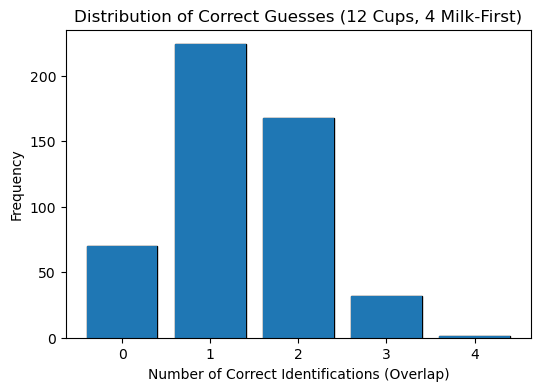

In [103]:
# Create a bar chart of how often each overlap (0–4) occurs.
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(counts[0], counts[1], color="skyblue", edgecolor="black")

# Add labels and title for clarity.
ax.set_xlabel("Number of Correct Identifications (Overlap)")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Correct Guesses (12 Cups, 4 Milk-First)")

# Bar chart.
ax.bar(counts[0], counts[1]);

#### Conclusion

In this extended version of the Lady Tasting Tea experiment, we prepared 12 cups:
•	4 with milk poured first
•	8 with tea poured first.
The participant must correctly identify which 4 cups were milk-first.

In summary of the above Simulation Process
1.	We represented the cups as labeled numbers from 0–11.
2.	We used itertools.combinations() to generate all possible ways of choosing 4 cups from 12 (a total of 495 combinations).
3.	A random selection of 4 cups (simulating the participant’s guesses) was compared to every possible true combination.
4.	We computed how many cups overlapped between the guessed and true milk-first sets, and visualized the frequency of correct identifications (0–4 correct).

This confirmed that only 1 of 495 possible configurations corresponds to a perfect match — meaning that a participant choosing randomly has only a 1/495 ≈ 0.00202 (0.2%) chance of being completely correct by luck.

If we compare to the original experiment which was preparing 8 cups: 4 with milk poured first & 4 with tea poured first. The extended design is much more stringent. Random guessing is now almost 7 times less likely to succeed by chance compared to the original design.

NEED TO PUT IN A BOX HERE
Design	Total Cups	Milk-First	Chance of Perfect Guess

Original	8	4	1/70 ≈ 0.0143 (1.4%)

Extended	12	4	1/495 ≈ 0.0020 (0.2%)


Because the probability of a perfect score by guessing is much smaller in the extended experiment, this design provides stronger statistical evidence against random guessing.
Therefore:
•	There is no reason to relax the p-value threshold (e.g., keep α = 0.05).
•	In fact, the extended test naturally has a smaller p-value threshold built into its structure, making it more conservative and more powerful at detecting real ability.

The simulation and combinatorial analysis both show that extending from 8 to 12 cups drastically lowers the probability of success by chance. A participant who correctly identifies all 4 milk-first cups in the 12-cup experiment would have provided very strong evidence that they truly can tell the difference between tea-first and milk-first preparation.
________________________________________


## Problem 2: Normal Distribution

Generate 100,000 samples of size 10 from the standard normal distribution.
For each sample, compute the standard deviation with `ddof=1` (sample SD) and with `ddof=0` (population SD).
Plot histograms of both sets of values on the same axes with transparency.
Describe the differences you see.
Explain how you expect these differences to change if the sample size is increased.


## Problem 3: t-Tests

A type II error occurs when a test fails to reject the null hypothesis even though it is false.
For each mean difference $d = 0, 0.1, 0.2, \dots, 1.0$, repeat the following simulation 1,000 times:

1. Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean $d$ and standard deviation 1.
2. Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.
3. Record the proportion of times the null hypothesis is not rejected.

Plot this proportion against $d$, and explain how the type II error rate changes as the difference in means increases.


## Problem 4: ANOVA

Generate three independent samples, each of size 30, from normal distributions with means 0, 0.5, and 1, each with standard deviation 1.

1. Perform a one-way ANOVA to test whether all three means are equal.
2. Perform three independent two-sample t-tests: samples 1 vs 2, 1 vs 3, and 2 vs 3.
3. Compare the conclusions.

Write a short note on why ANOVA is preferred over running several t-tests.